In [10]:
import numpy as np
import os
import tensorflow as tf
from scipy.misc import imread
from matplotlib import pyplot as plt
import random

In [11]:
# define the images and annotations path
base_dataset_dir = "/home/thalles_silva/DataPublic/Road_and_Buildings_detection_dataset/mass_merged"
train_dataset_base_dir = os.path.join(base_dataset_dir, "test")
images_folder_name = "sat/"
annotations_folder_name = "map/"
train_images_dir = os.path.join(train_dataset_base_dir, images_folder_name)
train_annotations_dir = os.path.join(train_dataset_base_dir, annotations_folder_name)

In [12]:
# read the train.txt file. This file contains the training images' names
file = open(os.path.join(train_dataset_base_dir, "test.txt"), 'r')
images_filename_list = [line for line in file]
number_of_train_examples = len(images_filename_list)
print("number_of_train_examples:", number_of_train_examples)

number_of_train_examples: 10


In [13]:
def read_image_and_annotation(train_images_dir, train_annotations_dir, image_name):
    # read the input and annotation images
    image = imread(train_images_dir + image_name.strip() + ".tiff")
    annotation = imread(train_annotations_dir + image_name.strip() + ".tif")

    return image, annotation

In [14]:
image, annotation = read_image_and_annotation(train_images_dir, train_annotations_dir, images_filename_list[0])

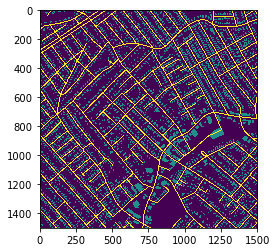

In [15]:
plt.imshow(annotation)
plt.show()

In [16]:
prediction = imread("/home/thalles_silva/DataPublic/SemanticSegmentation/Projects/ssai-cnn/results/MnihCNN_multi_2017-06-23_17-13-34/ma_prediction_400/evaluation_400/22828930_15/pred_argmax.jpg")

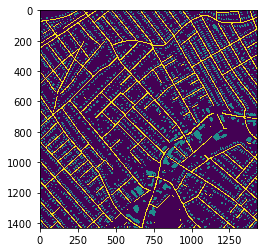

In [17]:
plt.imshow(prediction)
plt.show()

In [18]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
import time
import numpy as np
from utils.evaluation import relax_precision
from utils.evaluation import relax_recall

side = 1500
relax = 1
pred = np.random.rand(side, side)
label = np.asarray(np.random.rand(side, side) > 0.8, dtype=np.int32)


def calc_prec_recall(pred, label, t):
    deno = 1.0 / 256 * t
    pred = np.asarray(pred >= deno, dtype=np.int32)
    positive = np.sum(pred == 1)
    true = np.sum(label == 1)
    prec_tp = relax_precision(pred, label, relax)
    recall_tp = relax_recall(pred, label, relax)

    if prec_tp > positive or recall_tp > true:
        print(positive, prec_tp, true, recall_tp)
        sys.exit('Calculation is wrong.')

    prec = prec_tp / float(positive) if positive > 0 else 1.0
    recall = recall_tp / float(true) if true > 0 else 1.0

    return (prec, recall)

for t in range(256):
    st = time.time()
    prec, recall = calc_prec_recall(pred, label, t)
    print(prec, recall, time.time() - st)

ImportError: libboost_numpy.so: cannot open shared object file: No such file or directory